ex2 8.3 Linear ramp

In [3]:
# import some stuff

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter

plt.rc('animation', html='jshtml') #something to do with with jupyter notebooks, I think


Time taken to reach end of ramp: 3.57361347297801 seconds


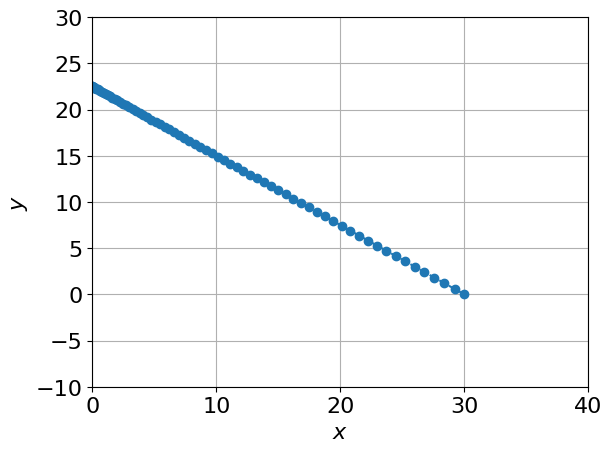

RuntimeError: x must be a sequence

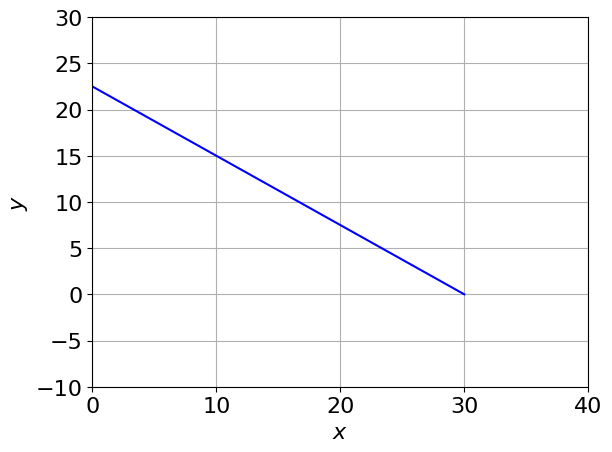

In [11]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter

class StraightRamp:
    def __init__(self, H=22.5, W=30, tinit=0, tfinal=10, g=9.8, y0=22.5):
        self.H = H
        self.W = W
        self.trange = [tinit, tfinal]
        self.g = g
        self.y0 = y0
        self.init_conditions = [0, y0 - 1e-7]
        self.ts_straight = None
        self.xs_straight = None
        self.ys_straight = None
        self.t_event = None

    def slope_straight(self, x):
        return -self.H / self.W

    def ramp_system(self, t, z):
        x, y = z
        dydx = self.slope_straight(x)
        dxdt = np.sqrt(2 * self.g) * np.sqrt(abs(self.y0 - y)) / np.sqrt(1 + dydx**2)
        dydt = dydx * dxdt
        return [dxdt, dydt]

    def stop_at_x_30(self, t, z):
        x, _ = z
        return 30 - x

    def solve_straight_ramp(self):
        stop_event = lambda t, z: self.stop_at_x_30(t, z)
        stop_event.terminal = True
        stop_event.direction = -1  

        sol = solve_ivp(lambda t, z: self.ramp_system(t, z), self.trange, self.init_conditions, max_step=0.05, events=stop_event)
        
        if sol.t.size > 1:
            self.ts_straight = sol.t
            self.xs_straight = sol.y[0]
            self.ys_straight = sol.y[1]
            self.t_event = sol.t_events[0][0]
            print(f'Time taken to reach end of ramp: {self.t_event} seconds')
        else:
            print("No valid trajectory was found.")

    def plot_ramp(self):
        if self.xs_straight is not None and self.ys_straight is not None:
            plt.rc('font', size=16)
            fig, ax = plt.subplots(1, 1)
            ax.plot(self.xs_straight, self.ys_straight, 'o', linestyle='--')
            ax.grid()
            ax.set_xlim([0, 40])
            ax.set_ylim([-10, 30])
            ax.set_xlabel('$x$')
            ax.set_ylabel('$y$')
            plt.savefig('lin_ramp.png')
            plt.show()
            plt.close()
        else:
            print("No data to plot.")

    def animate_ramp(self):
        if self.xs_straight is not None and self.ys_straight is not None and len(self.xs_straight) > 1:
            fig, ax = plt.subplots()
            ax.set_xlim([0, 40])
            ax.set_ylim([-10, 30])
            ax.set_xlabel('$x$')
            ax.set_ylabel('$y$')
            ax.grid()
            ramp, = ax.plot(self.xs_straight, self.ys_straight, 'b-')
            box, = ax.plot([], [], 'ro', markersize=10)

            def update(frame):
                if frame < len(self.xs_straight) and frame < len(self.ys_straight):
                    box.set_data(self.xs_straight[frame], self.ys_straight[frame])
                return [box]

            anim = animation.FuncAnimation(fig, update, frames=range(0, len(self.ts_straight), 2), interval=50, blit=True)
            anim.save('sliding_box_straight.gif', writer=PillowWriter(fps=20))
            plt.close()
        else:
            print("Not enough data to create animation.")

# Usage example
ramp = StraightRamp()
ramp.solve_straight_ramp()
ramp.plot_ramp()
ramp.animate_ramp()


In [ ]:
class parabola_ramp():
    
    def slope_parabola(x):
        return 0.150 * x - 3